# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
#lower the number more important the role
cast = pd.read_csv('cast.csv')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
movies.shape[0]

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title.str.contains('Batman')]
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
harry_potter_df = movies[movies.title.str.contains('Harry potter', case=False)].sort_values(by='year', ascending=False)
harry_potter_df

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year==2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018) ])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
movies[(movies.title == 'Hamlet') & (movies.year>=2000)].sort_values(by='year', ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
inception_df = cast[cast['title'] == 'Inception']
inception_df[inception_df.n.isna()].shape[0]

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
inception_df.n.count()

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
inception_sorted_df =inception_df.sort_values(by=['n'], ascending=True)
inception_sorted_df[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
list(cast[cast.character.str.contains('Albus Dumbledore')].title)

['Epic Movie',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Chamber of Secrets',
 "Harry Potter and the Sorcerer's Stone",
 'Ultimate Hero Project',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Potter']

In [23]:
list(cast[cast.character.str.contains('Albus Dumbledore')].name.unique())

['Dane Farwell',
 'Michael Gambon',
 'Richard Harris',
 "George (X) O'Connor",
 'Toby Regbo',
 'Timothy Tedmanson']

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
cast[cast.name == 'Keanu Reeves'].name.count()


62

In [25]:
#for lead role n has no NAN value 
k = cast[cast.name== 'Keanu Reeves']
k = k[k['n'].notna()]
k = k[k.year>= 1999]
k.sort_values(by='year')

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [26]:
cast[(cast.year>=1950 ) & (cast.year<=1960)].type.value_counts()

actor      171302
actress     63333
Name: type, dtype: int64

In [27]:
cast[(cast.year>=2007 ) & (cast.year<=2017)].type.value_counts()

actor      922782
actress    529631
Name: type, dtype: int64

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [54]:
print("List the total number of leading roles available from 2000 to present")
print(len(cast[(cast.n == 1.0) & (cast.year >= 2000) & (cast.year <= 2020)]))
len(cast[(cast.n == 1.0) & (cast.year > 1999)])

List the total number of leading roles available from 2000 to present
60568


60568

In [55]:
print("List the total number of non-leading roles available from 2000 - present (exclude support cast)")
print(len(cast[(cast.n > 1.0) & (cast.year >= 2000) & (cast.year <= 2020)]))
len(cast[(cast.n > 1.0) & (cast.year > 1999)])

List the total number of non-leading roles available from 2000 - present (exclude support cast)
1001710


1001710

In [56]:
print("List the total number of support\extra-credit roles available from 2000 - present")
print(len(cast[(cast.n.isnull()) & (cast.year >= 2000) & (cast.year <= 2020)]))
len(cast[(cast.n.isnull()) & (cast.year > 1999)])

List the total number of support\extra-credit roles available from 2000 - present
887404


887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Honeymoon               11
Freedom                 11
The Three Musketeers    11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

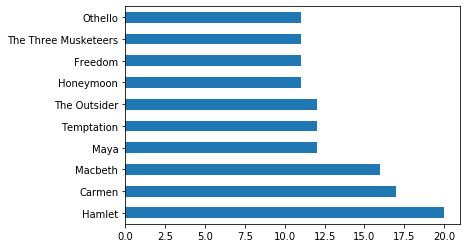

In [32]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [33]:
movies.year.value_counts()[0:3].index

Int64Index([2017, 2016, 2015], dtype='int64')

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

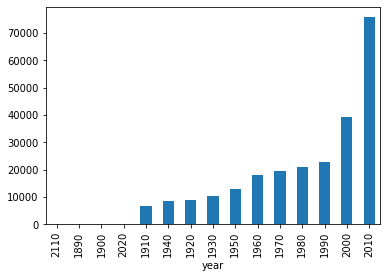

In [34]:
import numpy as np
movies_by_decade = movies.groupby((movies.year // 10) * 10).size()
movies_by_decade.sort_values().plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [35]:
cast.character.value_counts()[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [36]:
herself_df = cast[cast.character=='Herself']
sorted_herself_df = herself_df.sort_values(by='n')
sorted_herself_df.name[:10]

3355225     Brigitte Nielsen
3424289        Rosita Pinedo
2777370        Sharon Cuneta
3319148    Marguerite Moreno
3496694         Daniela Romo
2825700      Ghena Dimitrova
3218478          Ginger Lynn
2661807       Myriam Brabant
3746500    Elaine Williamson
2929502         Eleanor Gary
Name: name, dtype: object

In [37]:
himself_df = cast[cast.character=='Himself']
sorted_himself_df = himself_df.sort_values(by='n')
sorted_himself_df.name[:10]

530147             Ricardo Dar?n
1355846              Bob Log III
815896              Oreste Genta
662062         El Hijo del Santo
2242952            Dennis Taylor
687570              Angelo Evans
308942                Cody Burns
1929519             Andrew Rizzo
1903913    Danny 'Big Black' Rey
1580629           Rudy Ray Moore
Name: name, dtype: object

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [38]:
cast[cast.title.str.startswith('Zombie')].character.value_counts()[:10]

Zombie              405
Raider               79
Survivor             40
Extra                29
Town Citizen         26
Zombie Extra         23
Himself              19
Vampire              18
(segment "Home")     18
Prep Student         16
Name: character, dtype: int64

In [39]:
cast[cast.title.str.startswith('Police')].character.value_counts()[:10]

Inspecteur       12
Ninja             9
Skateboarder      6
Mart?n's Lady     6
Officer           5
Tackleberry       5
Tough             5
Proctor           4
Hightower         4
Comedian          4
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

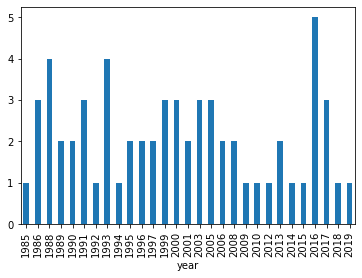

In [40]:
df_keanu_reeves = cast[cast.name=='Keanu Reeves'].groupby('year').size()
df_keanu_reeves.plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


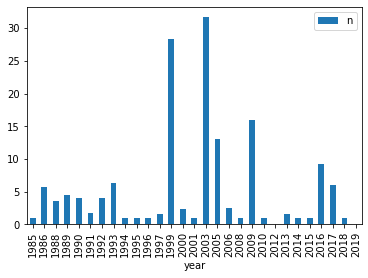

In [41]:
cast[cast.name=='Keanu Reeves'].groupby('year').agg({'n': 'mean'}).plot(kind='bar')



### Section II - Q7: Plot the number of "Hamlet" films made by each decade

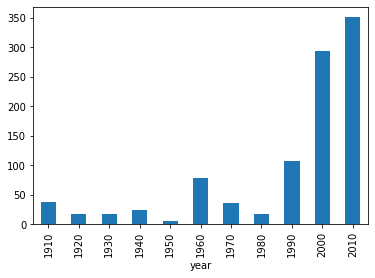

In [42]:
hamlet_cast = cast[cast.title.str.contains('Hamlet')]
hamlet_cast.groupby((cast.year // 10) * 10).size().plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [43]:
cast_year = cast[(cast.year>=1960) & (cast.year <=1970)]
print('leading role for actors '+str(cast_year[cast_year.type == 'actor'].shape[0]))
print('leading role for actresses '+str(cast_year[cast_year.type == 'actress'].shape[0]))



leading role for actors 149433
leading role for actresses 64643


In [44]:
cast_year = cast[(cast.year>=2000) & (cast.year <=2009)]
print('leading role for actors '+str(cast_year[cast_year.type == 'actor'].shape[0]))
print('leading role for actresses '+str(cast_year[cast_year.type == 'actress'].shape[0]))

leading role for actors 489468
leading role for actresses 263941


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [45]:
df = cast[(cast.name == 'Frank Oz')]
df = df.sort_values(['year'])
df_title_counts = df['title'].value_counts()
df_title_counts[df_title_counts>1]

The Muppet Movie                        8
The Muppets Take Manhattan              7
The Muppet Christmas Carol              7
The Great Muppet Caper                  6
Muppet Treasure Island                  4
Muppets from Space                      4
Follow That Bird                        3
The Adventures of Elmo in Grouchland    3
The Dark Crystal                        2
An American Werewolf in London          2
Name: title, dtype: int64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [46]:
df = cast[(cast.name == 'Frank Oz')]
df = df.character.value_counts()
df[df>1]


Yoda              6
Miss Piggy        6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

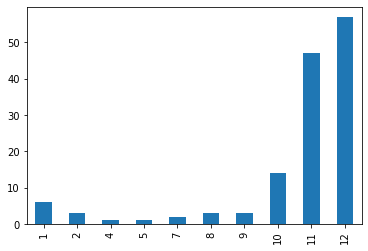

In [47]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

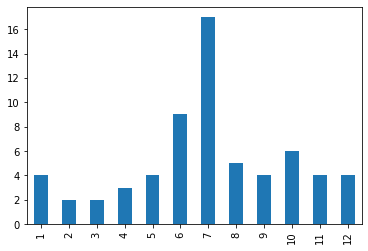

In [48]:
df = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country =='USA')] 
df.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

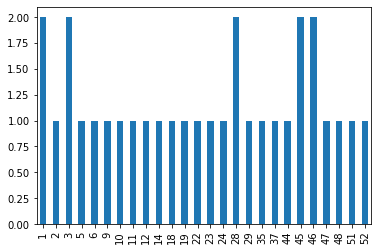

In [49]:
df = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country =='USA')] 
df.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [50]:
df = cast.merge(release_dates)
df = df[(df.name == 'Keanu Reeves') & (df.n.notnull()) & (df.country=="USA")].sort_values(['date'])
df[['title', 'country', 'date', 'name']]

,title,country,date,name
16380562,Youngblood,USA,1986-01-31,Keanu Reeves
17989030,River's Edge,USA,1987-05-08,Keanu Reeves
16837127,The Night Before,USA,1988-04-15,Keanu Reeves
16483953,Permanent Record,USA,1988-04-22,Keanu Reeves
8395767,Bill & Ted's Excellent Adventure,USA,1989-02-17,Keanu Reeves
18601507,Dangerous Liaisons,USA,1989-02-24,Keanu Reeves
14475951,Parenthood,USA,1989-05-26,Keanu Reeves
16635217,I Love You to Death,USA,1990-04-06,Keanu Reeves
6011799,Tune in Tomorrow...,USA,1990-11-02,Keanu Reeves
11452680,Point Break,USA,1991-07-12,Keanu Reeves


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

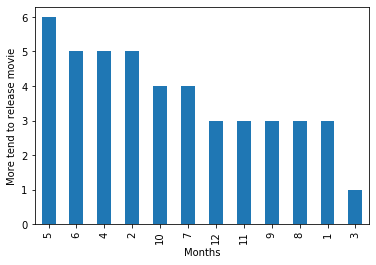

In [51]:
df.date.dt.month.value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('More tend to release movie')
plt.show()

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

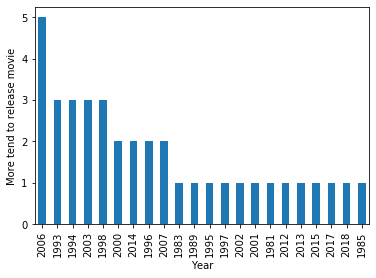

In [52]:
df = cast.merge(release_dates)
df = df[(df.name == 'Ian McKellen') & (df.n.notnull()) & (df.country=="USA")].sort_values(['date'])
df[['title', 'country', 'date', 'name']]
df.date.dt.year.value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('More tend to release movie')
plt.show()